In [1]:
import random
from src.genetic_functions import *

#### LOAD THE DATA

In [2]:
file_path = "data/jobshop1.txt"  

#Three instances with differences in jobs and machines are selected for testing in different populations
instances_to_extract = ["ft06", "abz5", "abz7"]

instances = extract_instances_to_dict(file_path, instances_to_extract)

# Check
if not instances:
    print("No instances were extracted. Check the names in instances_to_extract and the source file.")
else:
    for instance_name, instance_data in instances.items():
        print(f"instance: {instance_name}")
        print(f"Number of jobs: {instance_data['num_jobs']}")
        print(f"Number of machines: {instance_data['num_machines']}")
        print("Time matrix:")
        for row in instance_data["processing_times"]:
            print(row)
        print("------")

instance: abz5
Number of jobs: 10
Number of machines: 10
Time matrix:
[4, 88, 8, 68, 6, 94, 5, 99, 1, 67, 2, 89, 9, 77, 7, 99, 0, 86, 3, 92]
[5, 72, 3, 50, 6, 69, 4, 75, 2, 94, 8, 66, 0, 92, 1, 82, 7, 94, 9, 63]
[9, 83, 8, 61, 0, 83, 1, 65, 6, 64, 5, 85, 7, 78, 4, 85, 2, 55, 3, 77]
[7, 94, 2, 68, 1, 61, 4, 99, 3, 54, 6, 75, 5, 66, 0, 76, 9, 63, 8, 67]
[3, 69, 4, 88, 9, 82, 8, 95, 0, 99, 2, 67, 6, 95, 5, 68, 7, 67, 1, 86]
[1, 99, 4, 81, 5, 64, 6, 66, 8, 80, 2, 80, 7, 69, 9, 62, 3, 79, 0, 88]
[7, 50, 1, 86, 4, 97, 3, 96, 0, 95, 8, 97, 2, 66, 5, 99, 6, 52, 9, 71]
[4, 98, 6, 73, 3, 82, 2, 51, 1, 71, 5, 94, 7, 85, 0, 62, 8, 95, 9, 79]
[0, 94, 6, 71, 3, 81, 7, 85, 1, 66, 2, 90, 4, 76, 5, 58, 8, 93, 9, 97]
[3, 50, 0, 59, 1, 82, 8, 67, 7, 56, 9, 96, 6, 58, 4, 81, 5, 59, 2, 96]
------
instance: abz7
Number of jobs: 20
Number of machines: 15
Time matrix:
[2, 24, 3, 12, 9, 17, 4, 27, 0, 21, 6, 25, 8, 27, 7, 26, 1, 30, 5, 31, 11, 18, 14, 16, 13, 39, 10, 19, 12, 26]
[6, 30, 3, 15, 12, 20, 11, 19, 1

In [3]:
ft06_data = instances["ft06"]
abz5_data = instances["abz5"]

In [4]:
ft06_data

{'num_jobs': 6,
 'num_machines': 6,
 'processing_times': [[2, 1, 0, 3, 1, 6, 3, 7, 5, 3, 4, 6],
  [1, 8, 2, 5, 4, 10, 5, 10, 0, 10, 3, 4],
  [2, 5, 3, 4, 5, 8, 0, 9, 1, 1, 4, 7],
  [1, 5, 0, 5, 2, 5, 3, 3, 4, 8, 5, 9],
  [2, 9, 1, 3, 4, 5, 5, 4, 0, 3, 3, 1],
  [1, 3, 3, 3, 5, 9, 0, 10, 4, 4, 2, 1]]}

In [5]:
import random
import matplotlib.pyplot as plt

def genetic_algorithm(
    num_jobs, 
    num_machines, 
    processing_times, 
    population_size=100, 
    generations=500, 
    mutation_probability=0.1, 
    crossover_method="one_point", 
    selection_method="tournament", 
    tournament_size=3,
    elitism_count = 2
):
    """
    Solves the Job Shop Scheduling Problem (JSSP) using a genetic algorithm.

    Args:
        num_jobs: Number of jobs.
        num_machines: Number of machines.
        processing_times: Array defining the machines and times for each operation.
        population_size: Size of the population.
        generations: Number of generations to run.
        mutation_probability: Probability of mutation.
        crossover_method: "one_point" or "cycle".
        selection_method: "tournament" or "roulette".
        tournament_size: Size of the tournament (only for tournament selection).

    Returns:
        best_chromosome: The best solution found.
        best_fitness: The makespan of the best solution.
        fitness_evolution: List with the minimum fitness value in each generation.
    """
    # Step 1: Initialize population
    population = [generate_chromosome(num_jobs, num_machines) for _ in range(population_size)]
    fitness_evolution = []

    # Evaluate initial fitness
    fitness_values = [
        compute_fitness_with_validation(chromosome, num_jobs, num_machines, processing_times)
        for chromosome in population
    ]

    for generation in range(generations):
        # Step 2: Selection of parents
        new_population = []

        # Elitism: select the best `elitism_count` chromosomes and add them directly to the new population
        sorted_population = sorted(zip(population, fitness_values), key=lambda x: x[1])  # Sort by fitness
        elites = [x[0] for x in sorted_population[:elitism_count]]  # Get the best elite chromosomes
        new_population.extend(elites)


        for _ in range((population_size - elitism_count) // 2):  # Each iteration generates two children
            if selection_method == "tournament":
                parent1 = tournament_selection(population, fitness_values, tournament_size)
                parent2 = tournament_selection(population, fitness_values, tournament_size)
            elif selection_method == "roulette":
                parent1 = roulette_selection(population, fitness_values)
                parent2 = roulette_selection(population, fitness_values)
            else:
                raise ValueError("Invalid selection method!")

            # Step 3: Crossover
            if crossover_method == "one_point":
                child1 = one_point_crossover(parent1, parent2)
                child2 = one_point_crossover(parent2, parent1)
            elif crossover_method == "cycle":
                child1 = cycle_crossover(parent1, parent2)
                child2 = cycle_crossover(parent2, parent1)
            else:
                raise ValueError("Invalid crossover method!")

            # Step 4: Mutation
            if random.random() < mutation_probability:
                if random.random() < 0.5:
                    child1 = mutation(child1)
                else:
                    child1 = mutate_rotation(child1)
            if random.random() < mutation_probability:
                if random.random() < 0.5:
                    child2 = mutation(child2)
                else:
                    child2 = mutate_rotation(child2)

            new_population.extend([child1, child2])

        # Update population and fitness
        population = new_population
        fitness_values = [
            compute_fitness_with_validation(chromosome, num_jobs, num_machines, processing_times)
            for chromosome in population
        ]

        # Track best fitness in this generation
        best_fitness = min(fitness_values)
        fitness_evolution.append(best_fitness)

        # Check if system reaches stationary state (e.g., no improvement in last 50 generations)
        if len(fitness_evolution) > 50 and all(
            fitness == fitness_evolution[-1] for fitness in fitness_evolution[-50:]
        ):
            print(f"Stationary state reached at generation {generation}")
            break

    # Return the best solution found
    best_index = fitness_values.index(min(fitness_values))
    best_chromosome = population[best_index]
    return best_chromosome, min(fitness_values), fitness_evolution


Running genetic algorithm for abz5
Stationary state reached at generation 293


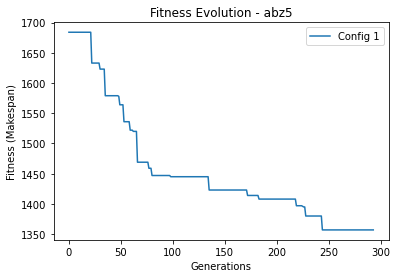

Stationary state reached at generation 50


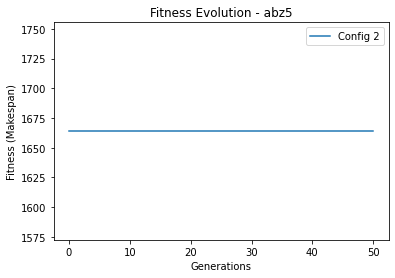

Stationary state reached at generation 212


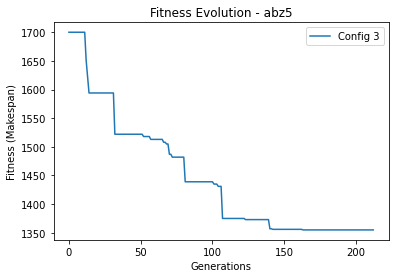

Stationary state reached at generation 50


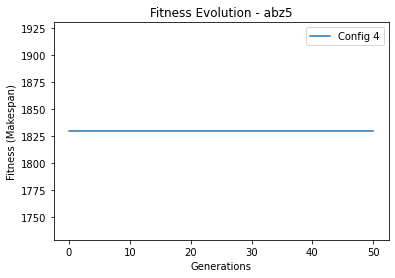

Stationary state reached at generation 50


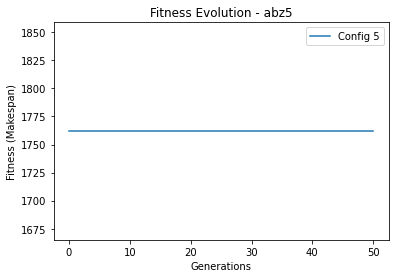

Stationary state reached at generation 50


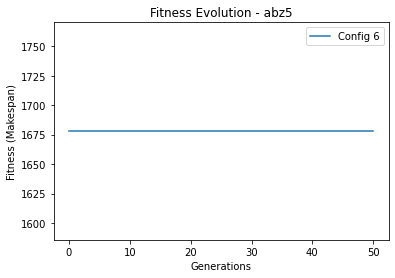

Running genetic algorithm for abz7
Stationary state reached at generation 294


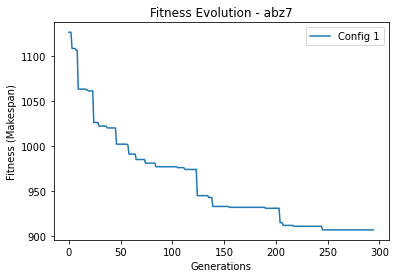

Stationary state reached at generation 62


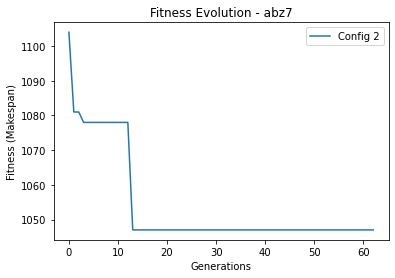

Stationary state reached at generation 50


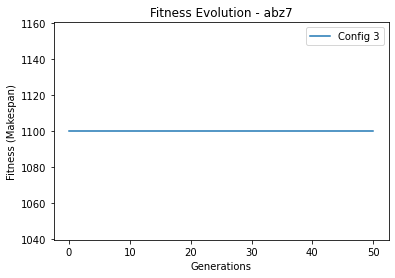

Stationary state reached at generation 141


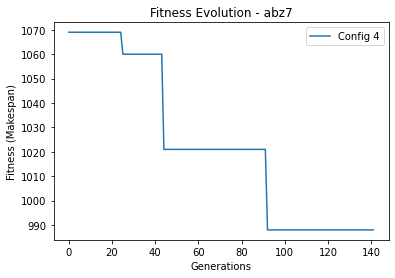

Stationary state reached at generation 165


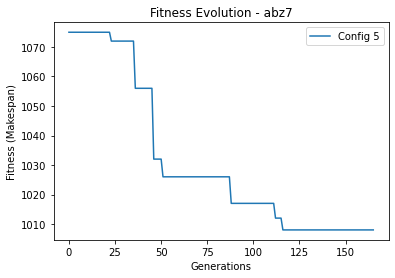

Stationary state reached at generation 50


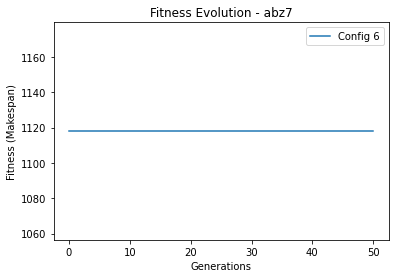

Running genetic algorithm for ft06
Stationary state reached at generation 50


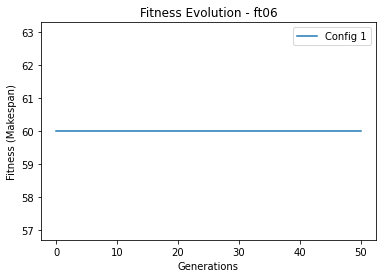

Stationary state reached at generation 52


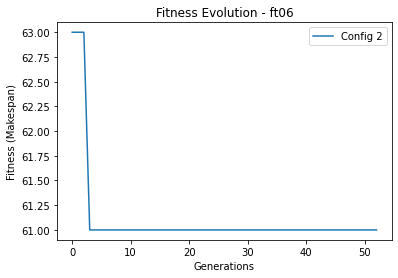

Stationary state reached at generation 53


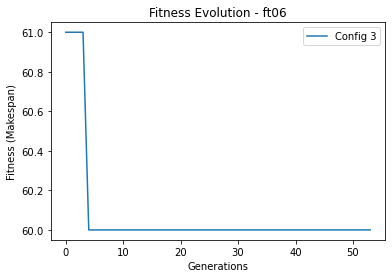

Stationary state reached at generation 66


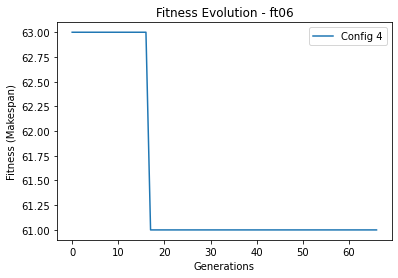

Stationary state reached at generation 50


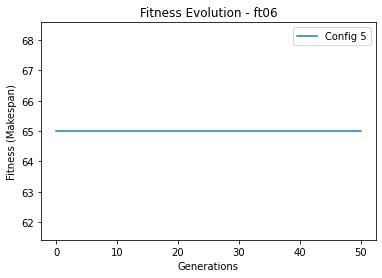

Stationary state reached at generation 50


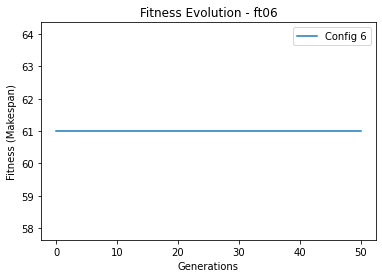

In [6]:
# Data
file_path = "data/jobshop1.txt"  

#Three instances with differences in jobs and machines are selected for testing in different populations
instances_to_extract = ["ft06", "abz5", "abz7"]

instances = extract_instances_to_dict(file_path, instances_to_extract)


results = []
for instance_name, instance_data in instances.items():
    print(f"Running genetic algorithm for {instance_name}")
    num_jobs = instance_data["num_jobs"]
    num_machines = instance_data["num_machines"]
    processing_times = instance_data["processing_times"]

    # By randonmes 6 diferent combinations are going to be choosen and executed
    for config in range(1, 7):
        population_size = random.choice([50, 100, 150])
        mutation_probability = random.choice([0.05, 0.1, 0.2])
        crossover_method = random.choice(["one_point", "cycle"])
        selection_method = random.choice(["tournament", "roulette"])

       
        best_chromosome, best_fitness, fitness_evolution = genetic_algorithm(
            num_jobs,
            num_machines,
            processing_times,
            population_size=population_size,
            generations=500,
            mutation_probability=mutation_probability,
            crossover_method=crossover_method,
            selection_method=selection_method,
            tournament_size=3
        )

        # save results
        results.append({
            "instance": instance_name,
            "config": config,
            "best_fitness": best_fitness,
            "fitness_evolution": fitness_evolution,
            "parameters": {
                "population_size": population_size,
                "mutation_probability": mutation_probability,
                "crossover_method": crossover_method,
                "selection_method": selection_method
            }
        })

        # Plot evolution
        plt.plot(fitness_evolution, label=f"Config {config}")
        plt.xlabel("Generations")
        plt.ylabel("Fitness (Makespan)")
        plt.title(f"Fitness Evolution - {instance_name}")
        plt.legend()
        plt.show()


In [7]:
results

[{'instance': 'abz5',
  'config': 1,
  'best_fitness': 1357,
  'fitness_evolution': [1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1684,
   1633,
   1633,
   1633,
   1633,
   1633,
   1633,
   1633,
   1633,
   1623,
   1623,
   1623,
   1623,
   1623,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1579,
   1578,
   1564,
   1564,
   1564,
   1564,
   1536,
   1536,
   1536,
   1536,
   1536,
   1536,
   1522,
   1522,
   1522,
   1520,
   1520,
   1520,
   1520,
   1469,
   1469,
   1469,
   1469,
   1469,
   1469,
   1469,
   1469,
   1469,
   1469,
   1469,
   1459,
   1459,
   1459,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1447,
   1445,
   1445,
   1445,
   1445,


### Chromosome encoding

### Validation of the chromosome

### Compute the fitness

In [8]:
# Datos de entrada
num_jobs = ft06_data['num_jobs']
num_machines = ft06_data['num_machines']
processing_times = ft06_data['processing_times']

chromosome = generate_chromosome(num_jobs, num_machines)
print("Cromosoma generado:", chromosome)
print(len(chromosome))

# Calcular el fitness con validación
fitness = compute_fitness_with_validation(chromosome, num_jobs, num_machines, processing_times)
if fitness == float('inf'):
    print("El cromosoma no es válido.")
else:
    print("Makespan (fitness) de la solución:", fitness)


Cromosoma generado: [5, 2, 0, 0, 4, 2, 4, 1, 1, 0, 3, 2, 1, 3, 1, 5, 4, 3, 5, 4, 2, 5, 5, 3, 0, 3, 5, 2, 4, 3, 0, 2, 1, 1, 4, 0]
36
Makespan (fitness) de la solución: 100


### Genetic Operators

#### Turnament selection

In [9]:
num_jobs = ft06_data['num_jobs']
num_machines = ft06_data['num_machines']
processing_times = ft06_data['processing_times']
population = [generate_chromosome(num_jobs, num_machines) for _ in range(100)]
fitness_values = [compute_fitness_with_validation(ind, num_jobs, num_machines, processing_times) for ind in population]

selected_roulette = roulette_selection(population, fitness_values)
print("Cromosoma seleccionado:", selected_roulette)

selected_tournament = tournament_selection(population, fitness_values)
print("Cromosoma seleccionado:", selected_tournament)

Cromosoma seleccionado: [0, 4, 2, 3, 5, 2, 1, 4, 1, 0, 1, 3, 2, 5, 3, 2, 3, 4, 4, 0, 4, 5, 2, 0, 5, 1, 1, 2, 3, 5, 5, 0, 1, 0, 3, 4]
Cromosoma seleccionado: [2, 0, 2, 3, 4, 2, 0, 4, 5, 4, 3, 1, 2, 3, 5, 4, 1, 5, 1, 0, 1, 3, 3, 5, 0, 0, 5, 3, 1, 2, 5, 4, 4, 2, 0, 1]


#### Crossover

In [10]:
# Cromosomas de ejemplo
parent1 = [4, 3, 1, 1, 5, 5, 5, 1, 4, 0, 2, 3, 2, 3, 1, 5, 3, 1, 0, 5, 0, 4, 2, 2, 1, 4, 3, 2, 4, 2, 0, 3, 5, 0, 0, 4]
parent2 = [3, 5, 1, 4, 1, 3, 4, 1, 0, 2, 5, 4, 2, 5, 3, 4, 2, 0, 5, 0, 2, 4, 0, 1, 3, 3, 2, 3, 0, 5, 1, 1, 2, 5, 0, 4]

# Crossover de un punto
child_one_point = one_point_crossover(parent1, parent2)
print("Hijo (crossover de un punto):", child_one_point)

# Crossover de dos puntos
child = cycle_crossover(parent1, parent2)
print(child)


Hijo (crossover de un punto): [4, 3, 1, 1, 5, 5, 5, 1, 4, 0, 2, 3, 2, 5, 3, 4, 2, 0, 5, 0, 2, 4, 0, 1, 3, 3, 2, 3, 0, 5, 1, 1, 2, 5, 0, 4]
[4, 3, 1, 1, 5, 5, 5, 1, 4, 0, 2, 3, 2, 3, 1, 5, 3, 1, 0, 5, 0, 4, 2, 2, 1, 4, 3, 2, 4, 2, 0, 3, 5, 0, 0, 4]


#### Mutation

In [11]:
# Cromosoma de ejemplo
cromosoma = [1, 2, 3, 4, 5, 6, 7, 8]

# Mutación por rotación
cromo = mutation(cromosoma)
cromosoma_mutado = mutate_rotation(cromosoma.copy())
print("Cromosoma después de mutación por rotación:", cromosoma_mutado, cromo)


Cromosoma después de mutación por rotación: [7, 8, 1, 2, 3, 4, 6, 5] [1, 2, 3, 4, 6, 5, 7, 8]


# Genetic algorithm

In [12]:
def genetic_algorithm(data, population_size=20, crossover_prob=0.8, mutation_prob=0.2, max_generations=100, no_improve_limit=10):
    num_jobs = data['num_jobs']
    num_machines = data['num_machines']
    processing_times = data['processing_times']

    # Inicializar población aleatoria
    population = [generate_chromosome(num_jobs, num_machines) for _ in range(population_size)]

    print(len(population))

    # Evaluar la población inicial
    fitness_values = [compute_fitness_with_validation(ind, num_jobs, num_machines, processing_times) for ind in population]
    print(len(fitness_values))
    best_fitness = min(fitness_values)
    best_solution = population[fitness_values.index(best_fitness)]
    print(best_solution)
    no_improve_count = 0

    for generation in range(max_generations):
        new_population = []

        # Generar nueva población
        while len(new_population) < population_size:
            # Selección de padres
            parent1 = tournament_selection(population, fitness_values)
            parent2 = tournament_selection(population, fitness_values)

            # Cruce
            if random.random() < crossover_prob:
                child = crossover(parent1, parent2, num_jobs)
                print(child)
            else:
                child = parent1

            # Mutación
            if random.random() < mutation_prob:
                child = mutation(child)

            new_population.append(child)

        # Evaluar la nueva población
        population = new_population
        fitness_values = [compute_fitness_with_validation(ind, num_jobs, num_machines, processing_times) for ind in population]

        # Actualizar mejor solución
        current_best_fitness = min(fitness_values)
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_solution = population[fitness_values.index(current_best_fitness)]
            no_improve_count = 0
        else:
            no_improve_count += 1

        # Criterio de convergencia
        if no_improve_count >= no_improve_limit:
            print(f"Convergencia alcanzada después de {generation + 1} generaciones.")
            break

        # Imprimir progreso
        print(f"Generación {generation + 1}: Mejor fitness = {best_fitness}")

    return best_solution, best_fitness